In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import dlsfunctions as dls
import seaborn as sns
import pandas as pd

In [2]:
%%latex
Let's see if we can normalize the output distribution in Bayes Take 13

<IPython.core.display.Latex object>

In [3]:
r = 2.24e-09
diameter = r * 2 + 3e-9
sigma = 2e-10

m = 20
c = 1
eta = 1e-3
n = 1.33 
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1

time_in = np.linspace(1e-4, 1e-1, 200)*0.001
gamma = dls.calc_gamma(m, c, eta, n, theta, k_b, t, lambda_0)

d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, diameter, sigma, c)

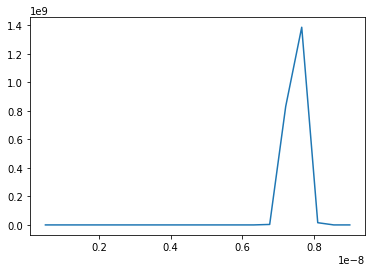

In [4]:
theta_input = np.append(f_1, beta)
plt.plot(d, f_1)

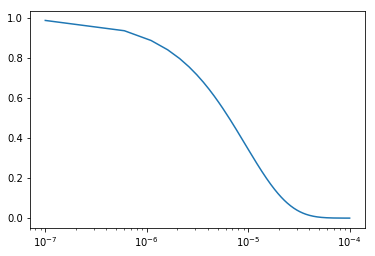

In [5]:
sim_data = dls.g2(theta_input, d, m, gamma, time_in)
plt.semilogx(time_in, sim_data)

In [10]:
ndim = 21
nwalkers = 100
nsteps = 2500

In [11]:
start_pos = [theta_input + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, dls.log_posterior, args=(d, sim_data, m, gamma, time_in))

In [12]:
result = sampler.run_mcmc(start_pos, nsteps)
sampler.acceptance_fraction

array([0.3244, 0.3388, 0.3148, 0.3456, 0.3244, 0.346 , 0.3392, 0.3204,
       0.3044, 0.3356, 0.3416, 0.3468, 0.3128, 0.328 , 0.3344, 0.3352,
       0.3296, 0.3396, 0.3428, 0.3456, 0.324 , 0.3452, 0.3172, 0.3312,
       0.3284, 0.3348, 0.3412, 0.322 , 0.3304, 0.3312, 0.3496, 0.3468,
       0.338 , 0.3356, 0.3268, 0.3324, 0.3212, 0.3156, 0.3212, 0.336 ,
       0.3268, 0.3284, 0.3392, 0.3196, 0.3368, 0.3204, 0.3164, 0.3288,
       0.3508, 0.3348, 0.3432, 0.3404, 0.3336, 0.3204, 0.3388, 0.3212,
       0.3412, 0.33  , 0.3376, 0.3464, 0.3324, 0.3384, 0.3532, 0.3436,
       0.3352, 0.326 , 0.3152, 0.344 , 0.3152, 0.3512, 0.3444, 0.3384,
       0.3364, 0.3396, 0.3176, 0.3324, 0.3412, 0.342 , 0.3172, 0.3316,
       0.3348, 0.344 , 0.3068, 0.33  , 0.3624, 0.3304, 0.324 , 0.3388,
       0.3432, 0.3356, 0.3296, 0.3352, 0.3064, 0.3128, 0.3348, 0.3208,
       0.3196, 0.3268, 0.3288, 0.3112])

In [ ]:
start_pos1 = [theta_input + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [ ]:
sampler1 = emcee.EnsembleSampler(nwalkers, ndim, dls.log_posterior,args=(d, sim_data, m, gamma, time_in))

In [ ]:
result1 = sampler1.run_mcmc(start_pos, nsteps)
sampler1.acceptance_fraction

In [ ]:
dls.check_distribution_norm(f_1, d[1] - d[0])

In [ ]:
plt.semilogx(time_in, sim_data)